In [36]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seawater as sw
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
from pandas import ExcelWriter

fig_dir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Saildrone/'

icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'
DWfile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/DiurnalWarming Present.xlsx'

baddir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/'

data_dir = 'F:/data/cruise_data/saildrone/2019_arctic/post_mission_combined/'

data_dir_out = 'F:/data/cruise_data/saildrone/2019_arctic/post_mission_combined_flags/'



In [13]:
#ds=xr.open_dataset('c:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/noaa_seaice/ice.mask.1036.nc')
#ds2 = ds.where(ds.ICE_MASK>0,drop=True)
#ds2

## read in ice, diurnal warming, and surface coolingpresent file

This file is a combination of the NOAA ice file & own analysis of data based on STD of salinity and SST

In [14]:
ds = pd.read_excel(icefile, sheet_name='data',index_col=0)
ds_ice = ds.to_xarray()
ds = pd.read_excel(DWfile, sheet_name='warm',index_col=0)
ds_warm = ds.to_xarray()
ds = pd.read_excel(DWfile, sheet_name='cold',index_col=0)
ds_cool = ds.to_xarray()


## Read in all the cruise full data

- swap dims from obs to time
- I checked & time = for both trajectories

In [15]:
ds = xr.open_mfdataset(data_dir+'*.nc',combine='nested',concat_dim='trajectory').load()

#get rid of bad salinity values
ds_masked=ds.where(ds.SAL_SBE37_MEAN>20)
ds['SAL_SBE37_MEAN']=ds_masked['SAL_SBE37_MEAN']

xlon=ds.lon
time_offset_to_lmt=(xlon/360.)*24.*60
ds['tlmt']=xlon
for i in range(2):
    ds['tlmt'][i,:]= ds.time.data+time_offset_to_lmt[i,:]*np.timedelta64(1,'m')# dt.timedelta(seconds=1)


In [16]:
ds

<xarray.Dataset>
Dimensions:                         (time: 215731, trajectory: 2)
Coordinates:
  * time                            (time) datetime64[ns] 2019-05-14T23:00:00 ... 2019-10-11T18:30:00
    lat                             (trajectory, time) float64 53.85 ... 53.84
    lon                             (trajectory, time) float64 1.558e+18 ... 1.571e+18
  * trajectory                      (trajectory) object '1036' '1037'
Data variables:
    SOG                             (trajectory, time) float64 1.41 ... 0.005
    SOG_FILTERED_MEAN               (trajectory, time) float64 1.194 ... 0.028
    SOG_FILTERED_STDDEV             (trajectory, time) float64 0.096 ... 0.02
    SOG_FILTERED_MAX                (trajectory, time) float64 1.48 ... 0.095
    SOG_FILTERED_MIN                (trajectory, time) float64 1.041 ... 0.002
    COG                             (trajectory, time) float64 324.0 ... 93.4
    COG_FILTERED_MEAN               (trajectory, time) float64 324.6 ... 83.2
    COG_FILTERED_STDDEV             (trajectory, time) float64 4.1 3.9 ... 90.9
    HDG                             (trajectory, time) float64 317.4 ... 323.7
    HDG_FILTERED_MEAN               (trajectory, time) float64 317.0 ... 323.6
    HDG_FILTERED_STDDEV             (trajectory, time) float64 0.0 0.0 ... 0.0
    ROLL_FILTERED_MEAN              (trajectory, time) float64 2.7 3.2 ... -1.1
    ROLL_FILTERED_STDDEV            (trajectory, time) float64 0.0 0.0 ... 0.0
    ROLL_FILTERED_PEAK              (trajectory, time) float64 2.7 3.2 ... -1.1
    PITCH_FILTERED_MEAN             (trajectory, time) float64 -1.1 ... -0.5
    PITCH_FILTERED_STDDEV           (trajectory, time) float64 0.0 0.0 ... 0.0
    PITCH_FILTERED_PEAK             (trajectory, time) float64 -1.1 ... -0.5
    HDG_WING                        (trajectory, time) float64 242.8 ... 171.7
    WING_HDG_FILTERED_MEAN          (trajectory, time) float64 229.9 ... 171.2
    WING_HDG_FILTERED_STDDEV        (trajectory, time) float64 5.5 3.7 ... 0.5
    WING_ROLL_FILTERED_MEAN         (trajectory, time) float64 0.2 0.8 ... 1.9
    WING_ROLL_FILTERED_STDDEV       (trajectory, time) float64 0.6 0.6 ... 0.1
    WING_ROLL_FILTERED_PEAK         (trajectory, time) float64 nan nan ... nan
    WING_PITCH_FILTERED_MEAN        (trajectory, time) float64 0.4 1.4 ... -1.0
    WING_PITCH_FILTERED_STDDEV      (trajectory, time) float64 0.9 1.2 ... 0.1
    WING_PITCH_FILTERED_PEAK        (trajectory, time) float64 3.3 4.7 ... -1.2
    WING_ANGLE                      (trajectory, time) float64 -74.6 ... -152.0
    UWND_MEAN                       (trajectory, time) float64 4.24 ... -0.23
    UWND_STDDEV                     (trajectory, time) float64 0.52 ... 0.14
    VWND_MEAN                       (trajectory, time) float64 5.59 ... 0.41
    VWND_STDDEV                     (trajectory, time) float64 0.48 ... 0.13
    WWND_MEAN                       (trajectory, time) float64 -0.33 ... -0.08
    WWND_STDDEV                     (trajectory, time) float64 0.32 0.3 ... 0.13
    GUST_WND_MEAN                   (trajectory, time) float64 7.78 ... 0.73
    GUST_WND_STDDEV                 (trajectory, time) float64 0.43 0.48 ... 0.1
    WIND_HEIGHT_MEAN                (trajectory, time) float64 4.998 ... 4.996
    WIND_HEIGHT_STDDEV              (trajectory, time) float64 0.002 ... 0.0
    TEMP_AIR_MEAN                   (trajectory, time) float64 6.32 ... 9.24
    TEMP_AIR_STDDEV                 (trajectory, time) float64 0.01 ... 0.01
    RH_MEAN                         (trajectory, time) float64 68.72 ... 99.84
    RH_STDDEV                       (trajectory, time) float64 0.73 0.85 ... 0.0
    BARO_PRES_MEAN                  (trajectory, time) float64 1.016e+03 ... 1.017e+03
    BARO_PRES_STDDEV                (trajectory, time) float64 0.02 ... 0.03
    PAR_AIR_MEAN                    (trajectory, time) float64 828.0 ... 33.0
    PAR_AIR_STDDEV                  (trajectory, time) float64 5.0 4.0 ... 2.0
  

# Create ice mask based on photo/data

0 2019-06-17T09:00:00.000000000
0 2019-06-22T16:30:00.000000000
0 2019-06-23T04:00:00.000000000
0 2019-07-17T23:30:00.000000000
0 2019-08-06T08:20:00.000000000
0 2019-08-06T20:20:00.000000000
0 2019-08-08T07:00:00.000000000
1 2019-06-17T08:00:00.000000000
1 2019-07-17T23:00:00.000000000
1 2019-08-04T00:00:00.000000000


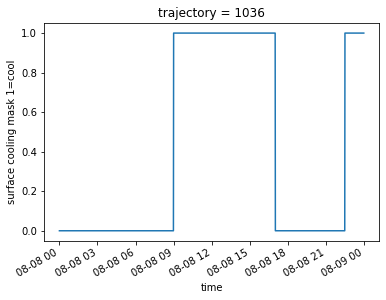

In [17]:
ice_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
ice_mask = xr.DataArray(ice_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'ice mask 1=ice'})
ds['ice_mask']=ice_mask
for iusv in range(2):
    ice =  ds_ice.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    for i in range(ice.usv.size):
        print(iusv,ice.start_time[i].data)
        cond = (ds_tem.time>=ice.start_time[i]) & (ds_tem.time<=ice.stop_time[i])
        ds_tem.ice_mask[cond]=1
    ds['ice_mask'][iusv,:]=ds_tem.ice_mask

tem_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
tem_mask = xr.DataArray(tem_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'Diurnal warming mask 1=warm'})
ds['warm_mask']=tem_mask
for iusv in range(2):
    tem =  ds_warm.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    if tem.usv.size>1:
        for i in range(tem.usv.size):
            cond = (ds_tem.time>=tem.start_time[i]) & (ds_tem.time<=tem.stop_time[i])
            ds_tem.warm_mask[cond]=1
    else:
        cond = (ds_tem.time>=tem.start_time) & (ds_tem.time<=tem.stop_time)
        ds_tem.warm_mask[cond]=1       
    ds['warm_mask'][iusv,:]=ds_tem.warm_mask

tem_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
tem_mask = xr.DataArray(tem_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'surface cooling mask 1=cool'})
ds['cool_mask']=tem_mask
for iusv in range(2):
    tem =  ds_cool.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    if tem.usv.size>1:
        for i in range(tem.usv.size):
            cond = (ds_tem.time>=tem.start_time[i]) & (ds_tem.time<=tem.stop_time[i])
            ds_tem.cool_mask[cond]=1
    else:
        cond = (ds_tem.time>=tem.start_time) & (ds_tem.time<=tem.stop_time)
        ds_tem.cool_mask[cond]=1       
    ds['cool_mask'][iusv,:]=ds_tem.cool_mask



    
    
ds.sel(time='08-08-2019')['cool_mask'][0,:].plot()

## Plot the INFLOW  0.6m bulk SST RBR minus SBE37 difference as a fnct of wind speed and local time of day 

###   Notice the increase in spread below 6 m/s, The positive might normally be explained by dirunal warming, but the negative?  

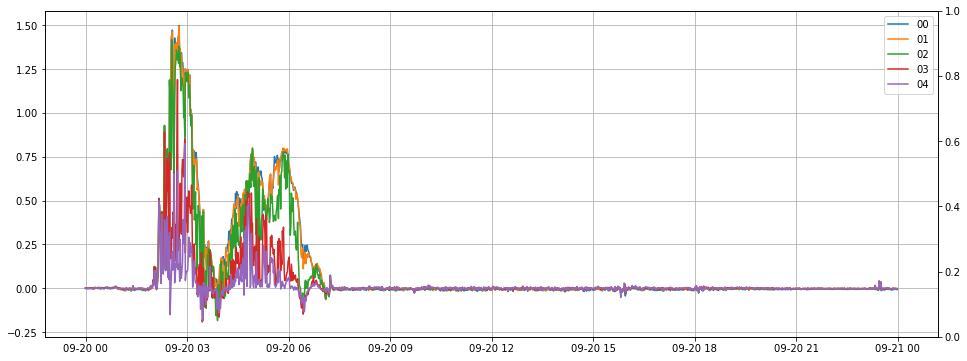

In [18]:
#look for diuranl warming
sub=ds.isel(trajectory=0).sel(time=slice('2019-09-20T00','2019-09-20T23'))
#sub=ds.isel(trajectory=0).sel(time=slice('2019-07-31T17','2019-07-31T18'))
fig, ax1 = plt.subplots(figsize=(16,6))
#ax1.plot(sub.time,sub.TEMP_AIR_MEAN-sub.sea_water_temperature_00_mean)
ax1.plot(sub.time,sub.sea_water_temperature_00_mean-sub.sea_water_temperature_06_mean,label='00')
ax1.plot(sub.time,sub.sea_water_temperature_01_mean-sub.sea_water_temperature_06_mean,label='01')
ax1.plot(sub.time,sub.sea_water_temperature_02_mean-sub.sea_water_temperature_06_mean,label='02')
ax1.plot(sub.time,sub.sea_water_temperature_04_mean-sub.sea_water_temperature_06_mean,label='03')
ax1.plot(sub.time,sub.sea_water_temperature_05_mean-sub.sea_water_temperature_06_mean,label='04')
ax1.legend(),ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(sub.time,sub.SOG_FILTERED_MEAN,'r')
#ax2.plot(sub.time,sub.wspd_MEAN,'r')
#ax2.set_x

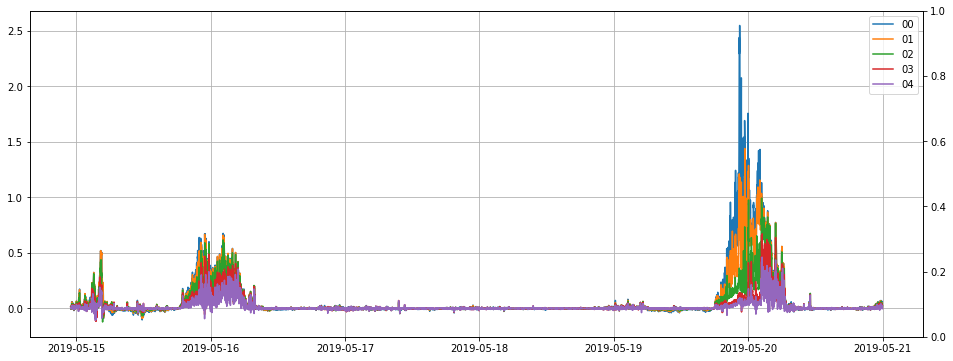

In [19]:
#look for diuranl warming
sub=ds.isel(trajectory=0).sel(time=slice('2019-05-10T00','2019-05-20T23'))
fig, ax1 = plt.subplots(figsize=(16,6))
#ax1.plot(sub.time,sub.TEMP_AIR_MEAN-sub.sea_water_temperature_00_mean)
ax1.plot(sub.time,sub.sea_water_temperature_00_mean-sub.sea_water_temperature_06_mean,label='00')
ax1.plot(sub.time,sub.sea_water_temperature_01_mean-sub.sea_water_temperature_06_mean,label='01')
ax1.plot(sub.time,sub.sea_water_temperature_02_mean-sub.sea_water_temperature_06_mean,label='02')
ax1.plot(sub.time,sub.sea_water_temperature_04_mean-sub.sea_water_temperature_06_mean,label='03')
ax1.plot(sub.time,sub.sea_water_temperature_05_mean-sub.sea_water_temperature_06_mean,label='04')
ax1.legend(),ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(sub.time,sub.SOG_FILTERED_MEAN,'r')
#ax2.plot(sub.time,sub.wspd_MEAN,'r')
#ax2.set_x

In [8]:
iwarm,icold=0,0
ds['tdif']=ds.sea_water_temperature_00_mean-ds.sea_water_temperature_06_mean
for itrag in range(2):
    ds2=ds.isel(trajectory=itrag).sel(time=slice(ds.time[0],ds.time[-1])).rolling(time=60,center=True).mean()
    tdif0 = ds2.sea_water_temperature_00_mean-ds2.sea_water_temperature_06_mean
    sv=np.zeros((200,2), dtype='datetime64[ns]')
    time1=ds.time[0]
    while time1<ds.time[-1]: 
#       ds2a = ds2.where(np.abs(tdif0)>0.1)
 #       tdif0a = ds2a.sea_water_temperature_00_mean-ds2a.sea_water_temperature_06_mean
        #drop all obs wehre diff>0.1
        ds2a = ds2.where(np.abs(tdif0)>0.1,drop=True)
        tdif0a = ds2a.sea_water_temperature_00_mean-ds2a.sea_water_temperature_06_mean
        if ds2a.dims['time']<1:
            time1=ds.time[-1]
            continue
        #create new data array using data from first diff>0.1 onward
        ds3=ds2.sel(time=slice(ds2a.time[0],ds2.time[-1]))
        tdif0 = ds3.sea_water_temperature_00_mean-ds3.sea_water_temperature_06_mean
        #drop all obs where diff<0.1
        ds3a = ds3.where(np.abs(tdif0)<0.05,drop=True)
        if ds3a.dims['time']<1:
            time1=ds.time[-1]
            continue
        time0 = ds2a.time[0]-np.timedelta64(30,'m')
        time1 = ds3a.time[0]+np.timedelta64(30,'m')

       
        df_save_new = pd.DataFrame([[ds.trajectory[itrag].data,time0.data,time1.data]], columns=['usv','start_time','stop_time'])
        if tdif0a[30].data>0:
            if iwarm==0:
                df_save_warm=df_save_new
                iwarm=1
            else:   
                #check if new start time is more than 2 hours ahead of last end time
                #if not, just combine rather than create new record
                dtime = (time0- df_save_warm.stop_time[df_save_warm.stop_time.size-1]) /np.timedelta64(1,'h') #minutes
                if dtime>2:
                    df_save_warm = df_save_warm.append(df_save_new, ignore_index=True)  
                else:
                    df_save_warm.stop_time[df_save_warm.stop_time.size-1]=time1.data
 #               df_save_warm = df_save_warm.append(df_save_new, ignore_index=True)           
        else:
            if icold==0:
                df_save_cold=df_save_new
                icold=1
            else:
                dtime = (time0- df_save_cold.stop_time[df_save_cold.stop_time.size-1]) /np.timedelta64(1,'h') #minutes
                if dtime>2:
                    df_save_cold = df_save_cold.append(df_save_new, ignore_index=True)  
                else:
                    df_save_cold.stop_time[df_save_cold.stop_time.size-1]=time1.data
#                df_save_cold = df_save_cold.append(df_save_new, ignore_index=True)           
            
        ds2=ds.isel(trajectory=itrag).sel(time=slice(time1,ds.time[-1])).rolling(time=60,center=True).mean()
        tdif0 = ds2.sea_water_temperature_00_mean-ds2.sea_water_temperature_06_mean
# DF TO EXCEL
filename_out=baddir+'Arctic_bad.xlsx'
writer = ExcelWriter(filename_out)
df_save_cold.to_excel(writer,'cold')
df_save_warm.to_excel(writer,'warm')
writer.save()

#to netcdf


In [20]:

badfile=baddir+'Arctic_bad.xlsx'
ds_tem = pd.read_excel(badfile, sheet_name='warm',index_col=1)
ds_warm = ds_tem.to_xarray()
ds_tem = pd.read_excel(badfile, sheet_name='cold',index_col=1)
ds_cool = ds_tem.to_xarray()

tem=ds_warm
for i in range(tem.usv.size):
    tt=pd.to_datetime(str(tem.start_time[i].data),format='%Y-%m-%dT%H:%M:%S')
    tt64=np.datetime64(tt)
    tem.start_time[i]=tt64
    tt=pd.to_datetime(str(tem.stop_time[i].data),format='%Y-%m-%dT%H:%M:%S')
    tt64=np.datetime64(tt)
    tem.stop_time[i]=tt64
ds_warm=tem
tem=ds_cool
for i in range(tem.usv.size):
    tt=pd.to_datetime(str(tem.start_time[i].data),format='%Y-%m-%dT%H:%M:%S')
    tt64=np.datetime64(tt)
    tem.start_time[i]=tt64
    tt=pd.to_datetime(str(tem.stop_time[i].data),format='%Y-%m-%dT%H:%M:%S')
    tt64=np.datetime64(tt)
    tem.stop_time[i]=tt64
ds_cool=tem

tem_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
tem_mask = xr.DataArray(tem_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'Diurnal warming mask 1=warm'})
ds['warm_mask']=tem_mask
for iusv in range(2):
    tem =  ds_warm.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    if tem.usv.size>1:
        for i in range(tem.usv.size):
            cond = (ds_tem.time>=tem.start_time[i]) & (ds_tem.time<=tem.stop_time[i])
            ds_tem.warm_mask[cond]=1
    else:
        cond = (ds_tem.time>=tem.start_time) & (ds_tem.time<=tem.stop_time)
        ds_tem.warm_mask[cond]=1       
    ds['warm_mask'][iusv,:]=ds_tem.warm_mask

tem_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
tem_mask = xr.DataArray(tem_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'surface cooling mask 1=cool'})
ds['cool_mask']=tem_mask
for iusv in range(2):
    tem =  ds_cool.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    if tem.usv.size>1:
        for i in range(tem.usv.size):
            cond = (ds_tem.time>=tem.start_time[i]) & (ds_tem.time<=tem.stop_time[i])
            ds_tem.cool_mask[cond]=1
    else:
        cond = (ds_tem.time>=tem.start_time) & (ds_tem.time<=tem.stop_time)
        ds_tem.cool_mask[cond]=1       
    ds['cool_mask'][iusv,:]=ds_tem.cool_mask


In [35]:
ds.to_netcdf(dir_data_out + 'saildrone-gen_5-arctic_misst_2019-sd10361037-20190514T230000-20191011T183000-1_minutes-v1.1575336154680-withSBE_flags.nc')



NameError: name 'dir_data_out' is not defined

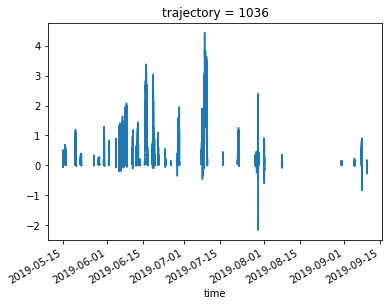

In [30]:
rdif = ds.TEMP_SBE37_MEAN - ds.sea_water_temperature_06_mean
rdif = rdif.where(ds.warm_mask>0)
rdif[0,:].plot()

In [21]:
for i in range(20,30): #df_save_warm.usv.size):
    plt.clf()
    ds_event = ds.sel(trajectory=df_save_warm.usv[i],time=slice(df_save_warm.start_time[i],df_save_warm.stop_time[i]))
    ds_day = ds.sel(trajectory=df_save_warm.usv[i],time=slice(df_save_warm.start_time[i]-np.timedelta64(720,'m'),df_save_warm.stop_time[i]+np.timedelta64(720,'m')))
    ds_day.tdif.plot(label='data')
    ds_event.tdif.plot(label='masked')
    plt.legend()
    plt.show()
    
    

NameError: name 'df_save_warm' is not defined

<Figure size 432x288 with 0 Axes>

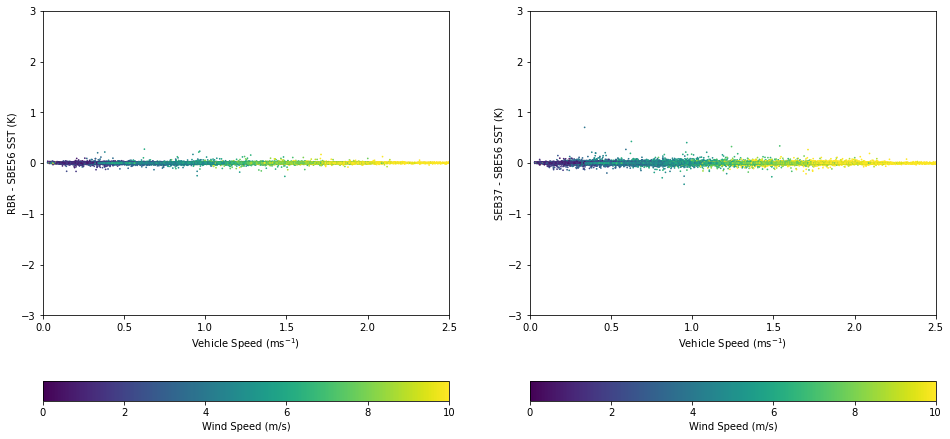

In [12]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(16,8))
tdif=ds.TEMP_CTD_RBR_MEAN-ds.sea_water_temperature_01_mean
tdif=tdif.where(ds.ice_mask==0)
tdif=tdif.where(ds.warm_mask==0)
tdif=tdif.where(ds.cool_mask==0)
for i in range(2):
    cs=ax1.scatter(ds.SOG_FILTERED_MEAN[i,:],tdif[i,:],c=ds.wspd_MEAN[i,:],s=.5,vmin=0,vmax=10)
ax1.set(xlabel='Vehicle Speed (ms$^{-1}$)', ylabel='RBR - SBE56 SST (K)')
ax1.set_xlim(0,2.5)
ax1.set_ylim(-3,3)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax1)
cbar.set_label('Wind Speed (m/s)')
tdif=ds.TEMP_SBE37_MEAN-ds.sea_water_temperature_01_mean
tdif=tdif.where(ds.ice_mask==0)
tdif=tdif.where(ds.warm_mask==0)
tdif=tdif.where(ds.cool_mask==0)
for i in range(2):
    cs=ax2.scatter(ds.SOG_FILTERED_MEAN[i,:],tdif[i,:],c=ds.wspd_MEAN[i,:],s=.5,vmin=0,vmax=10)
ax2.set(xlabel='Vehicle Speed (ms$^{-1}$)', ylabel='SEB37 - SBE56 SST (K)')
ax2.set_xlim(0,2.5)
ax2.set_ylim(-3,3)
cbar = fig.colorbar(cs,orientation='horizontal',ax=ax2)
cbar.set_label('Wind Speed (m/s)')
#fig.savefig(figure_output_dir+'figs/temp_sog_comparesbe56_ctds_data_filtered.png')

In [12]:
if dtime>np.datetime64:
    print(dtime)

ValueError: invalid __array_struct__

In [ ]:
tem_mask=np.zeros(ds.TEMP_AIR_MEAN.shape)
tem_mask = xr.DataArray(tem_mask,coords=[ds.trajectory,ds.time],dims=['trajectory','time'],
                                           attrs={'long_name':'Diurnal warming mask 1=warm'})
ds['warm_mask']=tem_mask
for iusv in range(2):
    tem =  ds_warm.sel(usv=int(ds.trajectory[iusv].data))
    ds_tem = ds.isel(trajectory=iusv)
    if tem.usv.size>1:
        for i in range(tem.usv.size):
            cond = (ds_tem.time>=tem.start_time[i]) & (ds_tem.time<=tem.stop_time[i])
            ds_tem.warm_mask[cond]=1
    else:
        cond = (ds_tem.time>=tem.start_time) & (ds_tem.time<=tem.stop_time)
        ds_tem.warm_mask[cond]=1       
    ds['warm_mask'][iusv,:]=ds_tem.warm_mask
